In [1]:
import torch
from torch import nn

import math 
import matplotlib.pyplot as plt

from ganpy import GAN

In [2]:
torch.manual_seed(111)

### Preparing training data

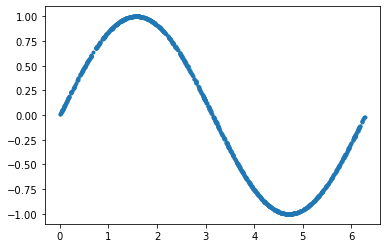

In [3]:
train_data_length = 1024

train_data      = torch.zeros((train_data_length,2))
train_data[:,0] = 2* math.pi * torch.rand(train_data_length)
train_data[:,1] = torch.sin(train_data[:,0])
train_labels    = torch.zeros(train_data_length)

train_set = [
    (train_data[i],train_labels[i]) for i in range(train_data_length)
]

plt.plot(train_data[:, 0], train_data[:, 1], ".")

### Data loader

In [4]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

### Discriminator

In [5]:
class Discriminator(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2,256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64,1),
            nn.Sigmoid()
        )
    
    def forward(self,x):
        output = self.model(x)
        return output

disc = Discriminator()

### Generator

In [6]:
class Generator(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2,16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32,2)
        )
    
    def forward(self,x):
        output = self.model(x)
        return output

gen = Generator()

In [7]:

gan = GAN(disc,gen)

### Learning parameters


In [8]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

gan.setParams(lr,num_epochs,loss_function)

### Optimizers


In [9]:
gan.prepareOptimizer()

### Training

In [10]:
gan.prepareTrainSet(batch_size,train_set)
gan.train()

print("DONE")      

Using CPU
Epoch: 31 Loss D.: 0.156594917178154
Epoch: 31 Loss G.: 2.1254444122314453
Epoch: 31 Loss D.: 0.4007149040699005
Epoch: 31 Loss G.: 1.5524946451187134
Epoch: 31 Loss D.: 0.4924185574054718
Epoch: 31 Loss G.: 1.4730618000030518
Epoch: 31 Loss D.: 0.4826952815055847
Epoch: 31 Loss G.: 1.243558645248413
Epoch: 31 Loss D.: 0.6058741211891174
Epoch: 31 Loss G.: 0.954456627368927
Epoch: 31 Loss D.: 0.4273727834224701
Epoch: 31 Loss G.: 1.4796762466430664
Epoch: 31 Loss D.: 0.5669652819633484
Epoch: 31 Loss G.: 0.8798891305923462
Epoch: 31 Loss D.: 0.5537304282188416
Epoch: 31 Loss G.: 1.370734691619873
Epoch: 31 Loss D.: 0.6417115330696106
Epoch: 31 Loss G.: 0.6274017691612244
Epoch: 31 Loss D.: 0.5393973588943481
Epoch: 31 Loss G.: 0.886060893535614
Epoch: 31 Loss D.: 0.7301512360572815
Epoch: 31 Loss G.: 0.8579632639884949
Epoch: 31 Loss D.: 0.6363418698310852
Epoch: 31 Loss G.: 1.1552438735961914
Epoch: 31 Loss D.: 0.631144642829895
Epoch: 31 Loss G.: 1.009913682937622
Epoch: 31

Traceback (most recent call last):
  File "/home/wallace/.conda/envs/gan/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_86126/1344526793.py", line 2, in <cell line: 2>
    gan.train()
  File "/home/wallace/Projects/experiments/GAN/ganpy.py", line 83, in train
  File "/home/wallace/Projects/experiments/GAN/ganpy.py", line 68, in stepGenerator
    output_discriminator_generated = self.disc(generated_samples)
  File "/home/wallace/.conda/envs/gan/lib/python3.8/site-packages/torch/nn/modules/module.py", line 532, in __call__
    result = self.forward(*input, **kwargs)
  File "/tmp/ipykernel_86126/1698715740.py", line 20, in forward
    output = self.model(x)
  File "/home/wallace/.conda/envs/gan/lib/python3.8/site-packages/torch/nn/modules/module.py", line 532, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/wallace/.conda/envs/gan/lib/python3.8/site-pac

### Testing results

before detaching tensor([[ 4.4910, -0.9843],
        [ 1.0746,  0.9194],
        [ 4.2506, -0.8911],
        [ 3.9366, -0.7185],
        [ 5.6095, -0.5985],
        [ 3.9288, -0.7149],
        [ 5.7182, -0.2271],
        [ 5.6953, -0.4995],
        [ 5.1129, -0.9320],
        [ 1.1591,  0.9539],
        [ 5.7373, -0.1758],
        [ 4.1392, -0.8384],
        [ 0.7861,  0.7329],
        [ 3.3187, -0.1428],
        [ 1.9264,  0.9930],
        [ 5.1248, -0.9368],
        [ 4.9726, -0.9759],
        [ 4.3389, -0.9358],
        [ 2.7951,  0.3404],
        [ 5.9150, -0.1125],
        [ 3.3658, -0.2154],
        [ 1.1878,  0.9662],
        [ 4.9064, -1.0013],
        [ 3.9587, -0.7375],
        [ 5.7226, -0.5421],
        [ 3.3410, -0.1929],
        [ 3.0979,  0.0504],
        [ 3.4496, -0.2931],
        [ 1.0074,  0.8772],
        [ 5.6279, -0.7478],
        [ 5.0108, -0.9655],
        [ 5.2269, -0.9069],
        [ 3.7436, -0.5685],
        [ 4.1437, -0.8666],
        [ 4.5301, -1.0031],
   

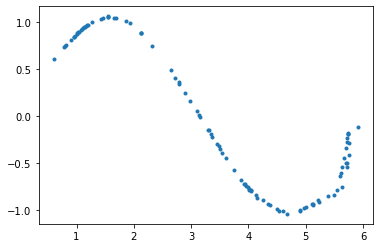

In [ ]:
generated_samples = gan.generate()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")